In [12]:
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy import stats
from nitime.algorithms import multi_taper_psd
from nitime.utils import dpss_windows
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
import statsmodels.formula.api as smf
from pandas import DataFrame as df
from pandas import concat
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlim, ylim, show, imshow, xlabel, ylabel, bar, figure, title
from matplotlib import rcParams
from numpy import hanning, where, histogram, arange
rcParams['figure.figsize'] = (15,5)

Refaça a análise dos spikes da aula de hoje usando as ferramentas que aprendemos na aula I de spikes (ISI, Fator Fano, Autocorrelação) e analise o LFP. O resultado dessas análises ajuda a explicar o resultado da coerência entre campo e spike?

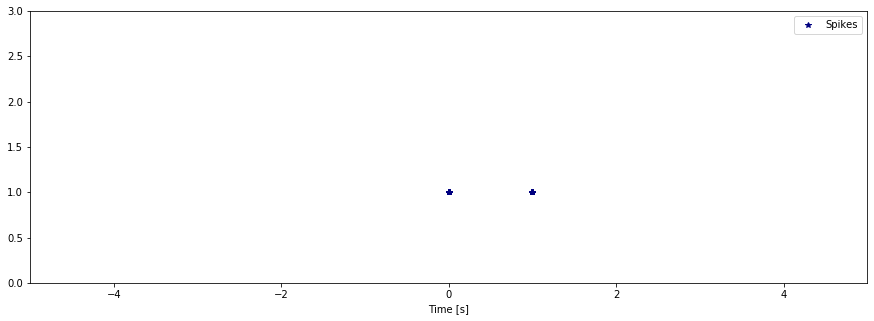

In [17]:
#ISI

data = sio.loadmat('Aula15-spikes-LFP-1.mat')
Spikes = data['n'][0]

ISI = np.diff(Spikes)

plot(Spikes, np.ones_like(Spikes), '*', color = "navy")    
plt.xlim([-5, 5])              
plt.ylim([0, 3])              
xlabel('Time [s]')            
plt.legend({'Spikes'})   
show()


In [18]:
#Fator Fano

FF = IncrementsLow50.var() / IncrementsLow50.mean()
print('FF =', FF50Low)

NameError: name 'IncrementsLow50' is not defined

In [30]:
#Autocorrelação

def autocorr(x, lags):
    xcorr = np.correlate(x - x.mean(), x - x.mean(), 'full')  
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               
    return xcorr[:lags+1]

Increments50, _ = np.histogram(Spikes, time_bins) 
autocorr(Increments50, 3)

time_bins = np.arange(0, 50, 0.001)                    
Increments50, _ = np.histogram(Spikes, time_bins) 
ACFLow = autocorr(Increments50, 100)                 

plot(ACFLow, '*', color = "red")        
N1 = len(Increments50)                    
sig = 2 / np.sqrt(N1)                       
plot([0, 100], [sig, sig], 'r:', color = "navy")           
plot([0, 100], [-sig, -sig], 'r:', color = "navy")
plt.xlim([0, 100])                         
plt.ylim([-.1, .1])                        
show()

NameError: name 'time_bins' is not defined

Faça a análise abaixo para os dados Aula15-spikes-LFP2.mat e Aula15-spikes-LFP3.mat

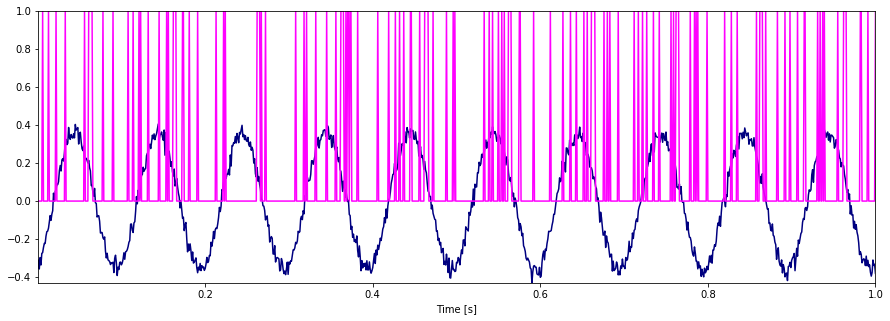

In [29]:
#Visualize os dados. Tem algum ritmo visível? É possível enxergar alguma associação entre spikes e o LFP?


data2 = sio.loadmat('Aula15-spikes-LFP-2.mat') 
y = data2['y']                               
n = data2['n']                                
t = data2['t'].reshape(-1)                    
plot(t,y[1,:], color = "navy")                               

plot(t,n[1,:], color = "fuchsia")
xlabel('Time [s]')
plt.autoscale(tight=True)



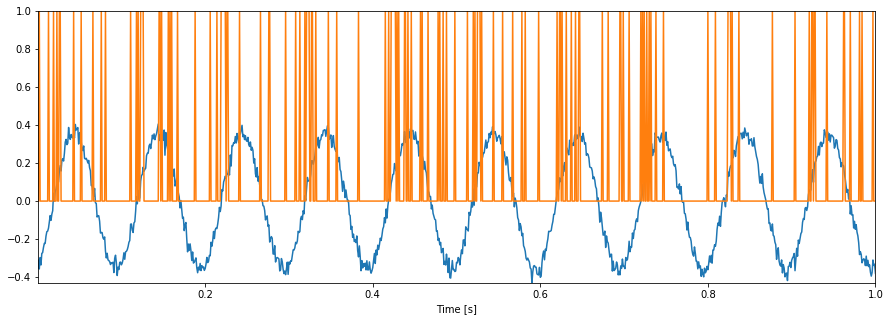

In [25]:
data3 = sio.loadmat('Aula15-spikes-LFP-3.mat') 
y = data3['y']                               
n = data3['n']                                
t = data3['t'].reshape(-1)                    
plot(t,y[1,:])                               

plot(t,n[1,:])
xlabel('Time [s]')
plt.autoscale(tight=True)

Text(0, 0.5, 'Voltage [mV]')

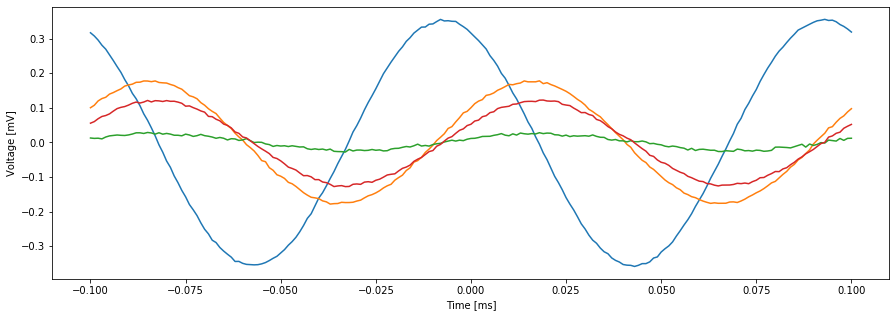

In [33]:
#Calcule o espectro dos spikes e LFP. Os ritmos são consistentes com os que aparecem na análise visual?

#Espectro 


win = 100                                     
K = np.shape(n)[0]                             
N = np.shape(n)[1]                             
STA = np.zeros([K,2*win+1])                    
for k in np.arange(K):                         
    spike_times = np.where(n[k,:]==1)[0]       
    counter=0
    for spike_t in spike_times:                
        if win < spike_t < N-win-1:            
            STA[k,:] = STA[k,:] + y[k,spike_t-win:spike_t+win+1]
            counter += 1
    STA[k,:] = STA[k,:]/counter

dt = t[1]-t[0]                    
lags = np.arange(-win,win+1)*dt   
plot(lags, STA[0,:])              
plot(lags, STA[5,:])
plot(lags, STA[9,:])
plot(lags, STA[15,:])
xlabel('Time [ms]')               
ylabel('Voltage [mV]')




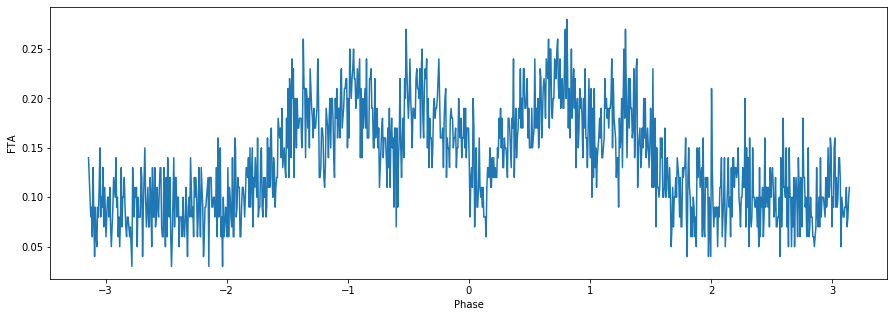

In [46]:
#LFP


def FTA_function(y,n,t,Wn):                  
    dt = t[1]-t[0]                           
    fNQ = 1/dt/2                             
    ord  = 100                               
    b = signal.firwin(ord, Wn, nyq=fNQ, pass_zero=False, window='hamming'); 
    FTA=np.zeros([K,N])                      
    for k in np.arange(K):                  
        Vlo = signal.filtfilt(b, 1, y[k,:])  
        phi = np.angle(signal.hilbert(Vlo))  
        indices = np.argsort(phi)            
        FTA[k,:] = n[k,indices]              
    phi_axis = np.linspace(-np.pi,np.pi,N)   
    return np.mean(FTA,0), phi_axis

Wn = [9,11]                                  
FTA, phi_axis = FTA_function(y,n,t,Wn)       

plot(phi_axis, FTA)
xlabel('Phase')
ylabel('FTA');


In [47]:
#Calcule o STA e  FTA. Existe alguma associação entre os spikes e o LFP?

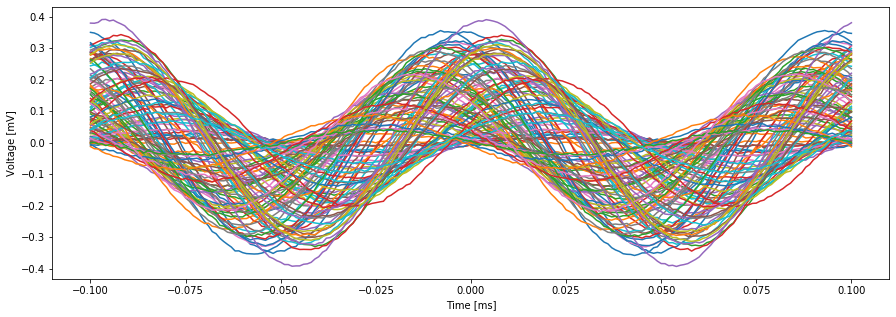

In [48]:
#STA

plot(lags,np.transpose(STA))        
xlabel('Time [ms]')
ylabel('Voltage [mV]');


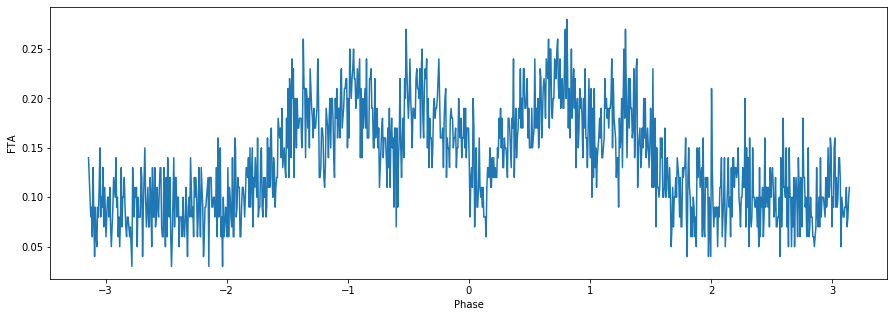

In [49]:
#FTA

def FTA_function(y,n,t,Wn):                  
    dt = t[1]-t[0]                           
    fNQ = 1/dt/2                             
    ord  = 100                               
    b = signal.firwin(ord, Wn, nyq=fNQ, pass_zero=False, window='hamming'); 
    FTA=np.zeros([K,N])                      
    for k in np.arange(K):                  
        Vlo = signal.filtfilt(b, 1, y[k,:])  
        phi = np.angle(signal.hilbert(Vlo))  
        indices = np.argsort(phi)            
        FTA[k,:] = n[k,indices]              
    phi_axis = np.linspace(-np.pi,np.pi,N)   
    return np.mean(FTA,0), phi_axis

Wn = [9,11]                                  
FTA, phi_axis = FTA_function(y,n,t,Wn)       

plot(phi_axis, FTA)
xlabel('Phase')
ylabel('FTA');



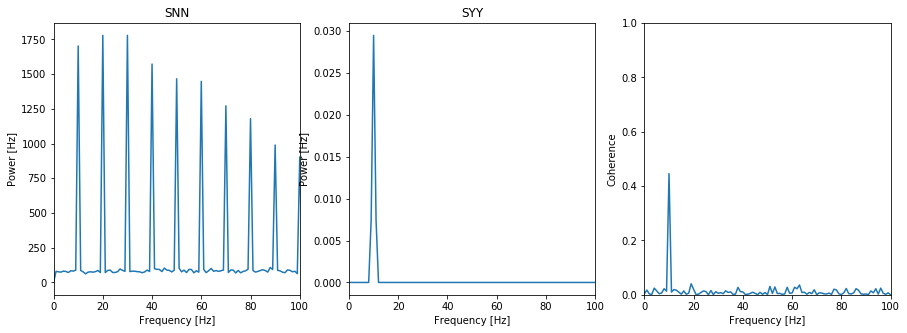

In [50]:
#Calcule a coerência campi-spike. Existe alguma relação de coerência entre os sinais?

SYY = np.zeros(int(N/2+1))                                       
SNN = np.zeros(int(N/2+1))                                       
SYN = np.zeros(int(N/2+1), dtype=complex)                        

for k in np.arange(K):                                           
    yf = np.fft.rfft((y[k,:]-np.mean(y[k,:])) *np.hanning(N))    
    nf = np.fft.rfft((n[k,:]-np.mean(n[k,:])))                   
    SYY = SYY + ( np.real( yf*np.conj(yf) ) )/K                  
    SNN = SNN + ( np.real( nf*np.conj(nf) ) )/K                  
    SYN = SYN + (          yf*np.conj(nf)   )/K                  

cohr = np.real(SYN*np.conj(SYN)) / SYY / SNN                     
f = np.fft.rfftfreq(N, dt)


plt.subplot(1,3,1)         
plot(f,SNN)
plt.xlim([0, 100])
xlabel('Frequency [Hz]')
ylabel('Power [Hz]')
title('SNN')

plt.subplot(1,3,2)        
T = t[-1]
plot(f,dt**2/T*SYY)        
plt.xlim([0, 100])
xlabel('Frequency [Hz]')
ylabel('Power [Hz]')
title('SYY')

plt.subplot(1,3,3)       
plot(f,cohr)
plt.xlim([0, 100])
plt.ylim([0, 1])
xlabel('Frequency [Hz]')
ylabel('Coherence');

In [57]:
#Use o modelo de GLM aplicado em sala. Oresultado do modelo é consistente com com as outras técnicas?

fNQ = 1/dt/2 
Wn = [44,46]                       
b = signal.firwin(ord, Wn, nyq = fNQ, pass_zero = False, window ='hamming');
 
    
del phi
phi=np.zeros([K,N])                
for k in np.arange(K):             
    Vlo = signal.filtfilt(b, 1, y[k,:])       
    phi[k,:] = np.angle(signal.hilbert(Vlo))  

n_reshaped   = np.copy(n)
n_reshaped   = np.reshape(n_reshaped,-1)   
phi_reshaped = np.reshape(phi, -1)         
                                           
X            = np.transpose([np.ones(np.shape(phi_reshaped)), np.cos(phi_reshaped), np.sin(phi_reshaped)])
Y            = np.transpose([n_reshaped])  

model = sm.GLM(Y,X,family=sm.families.Poisson())    
res   = model.fit()                                 

phi_predict = np.linspace(-np.pi, np.pi, 100)      
X_predict   = np.transpose([np.ones(np.shape(phi_predict)), np.cos(phi_predict), np.sin(phi_predict)])
Y_predict   = res.get_prediction(X_predict, linear='False')

FTA, phi_axis = FTA_function(y,n,t,Wn)       

plot(phi_axis, FTA)                          
plot(phi_predict, Y_predict.predicted_mean, 'k')
plot(phi_predict, Y_predict.conf_int(), 'k:')
xlabel('Phase')
ylabel('Probability of a spike');
                        

pval1=res.pvalues[1];       
pval2=res.pvalues[2];       
print(pval1, pval2)
pval1=res.pvalues[1];       
pval2=res.pvalues[2];       
print(pval1, pval2)

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'int'